# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">Đồ án Cuối kì</p>**
## **<p style = "text-align: center">KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> KHÁM PHÁ, THỐNG KÊ CỦA TOP CÁC CA KHÚC TRÊN SPOTIFY</p>
<p style = "text-align: center"> Sinh viên thực hiện </p>

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 20120040 | Nguyễn Quang Gia Bảo |
| 20120127 | Trần Minh Tuấn Kiệt |
| 20120136 | Huỳnh Tuấn Nam |
| 20120158 | Trần Hoàng Anh Phi |

---

# **Install the package**

# **Import the package**

In [1545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Setting**

In [1546]:
sns.set_style("ticks")
a4size = (11.7, 8.27)
a2size = (16.5, 23.4)
a2size_ls = (23.4, 16.5)

# **Information of dataset**

- Dataset được lấy từ <a href = "https://www.kaggle.com"> Kaggle </a>. <br>
- Dataset là thông tin giá cả của những căn nhà ở Hà Nội thông qua các đặc điểm của một căn nhà.<br>
- Trang của Dataset <a herf = "https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi"> https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi</a>. <br>
- Tác giả của Dataset: LE ANH DUC. <br>
- License: CC BY-NC-SA 4.0


---

# **EDA and Preprocessing**

Dataset sau khi download về được lưu trong thư mục csv <br>

Đưa dữ liệu DataFrame vào biến `housing_df`

In [1547]:
housing_df = pd.read_csv("csv/VN_housing.csv")

In [1548]:
housing_df.head()

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


### **1. Khám phá, tiền xử lí cho toàn bộ dữ liệu**

- **1.1 Số chiều của DataFrame**

In [1549]:
housing_df.shape

(82497, 13)

Dữ liệu gồm có `82497` dòng và `13` cột

- **1.2 Các dòng của Dataframe**

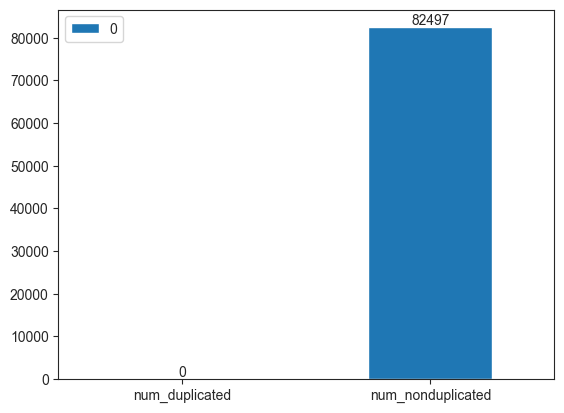

In [1550]:
num_duplicated = housing_df.duplicated().sum()
duplicated_df = pd.Series({
    "num_duplicated": num_duplicated,
    "num_nonduplicated": housing_df.shape[0] - num_duplicated
}).to_frame()

fig, ax = plt.subplots()
duplicated_df.plot.bar(rot = 0, ax = ax)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

Không có cột nào bị trùng.

- **1.3 Các cột của Dataframe**

In [1551]:
housing_df.columns

Index(['Unnamed: 0', 'Ngày', 'Địa chỉ', 'Quận', 'Huyện', 'Loại hình nhà ở',
       'Giấy tờ pháp lý', 'Số tầng', 'Số phòng ngủ', 'Diện tích', 'Dài',
       'Rộng', 'Giá/m2'],
      dtype='object')

##### **Cột `Unnamed: 0` có vẻ là cột giống index, nên xóa nó thôi.**

In [1552]:
housing_df = housing_df.drop(["Unnamed: 0"], axis = 1)

##### **Vì các cột có tên Tiếng Việt có dấu, nên có một ít "khó chịu" trong quá trình thực hiện đồ án. Nên ta sẽ thay đổi các tên cột.**


In [1553]:
housing_df = housing_df.rename(columns = {
    "Ngày": "Date",
    "Địa chỉ": "Address",
    "Quận": "District", # Quận
    "Huyện": "Ward", # Phường, Huyện
    "Loại hình nhà ở": "Type",
    "Giấy tờ pháp lý": "Legal",
    "Số tầng": "Number of floors",
    "Số phòng ngủ": "Number of bedrooms",
    "Diện tích": "Area",
    "Dài": "Length",
    "Rộng": "Width",
    "Giá/m2": "Price/m2"
})

In [1554]:
missing_dictionary = {
    "num_missing": housing_df.isna().sum(),
    "missing_ratio (%)": housing_df.isna().sum()*100/len(housing_df)
}
missing_df = pd.DataFrame(missing_dictionary)
missing_df

,num_missing,missing_ratio (%)
Date,1,0.001212
Address,48,0.058184
District,2,0.002424
Ward,48,0.058184
Type,32,0.038789
Legal,28887,35.015819
Number of floors,46098,55.878396
Number of bedrooms,39,0.047274
Area,2,0.002424
Length,62670,75.966399


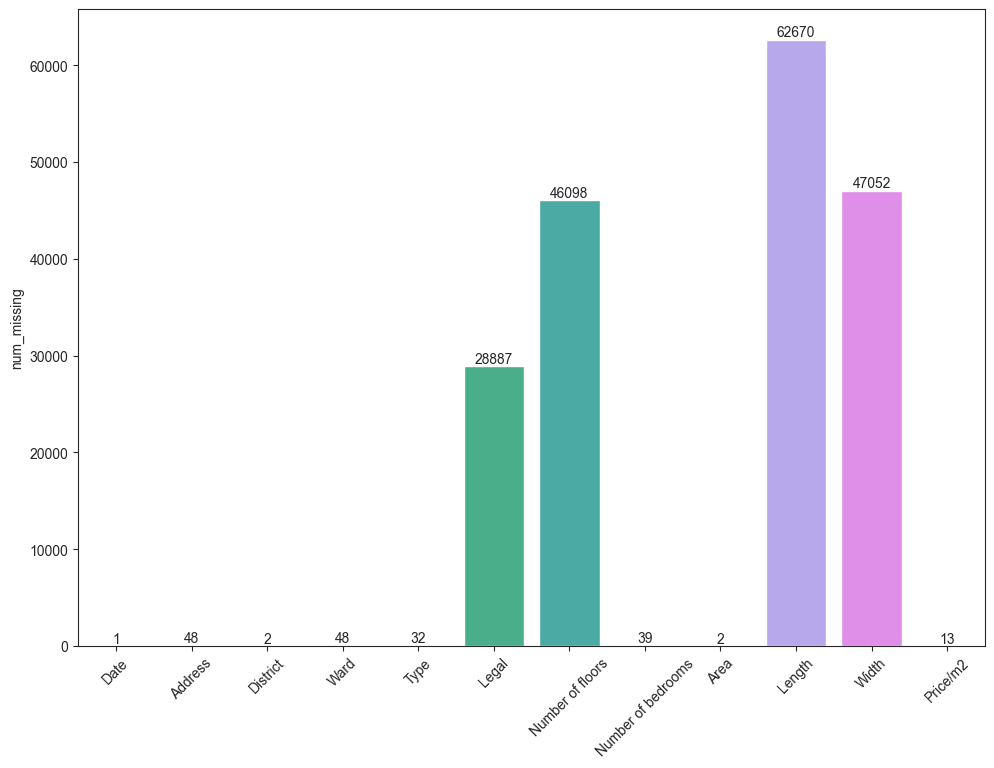

In [1555]:
fig, ax = plt.subplots()
#The size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.barplot(y = missing_df["num_missing"], x = missing_df.index, data = missing_df, ax = ax)
#Set rotation of x label
ax.tick_params(axis = 'x', rotation = 45)

#Add the value for each container
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

**Nhận xét**<br>
Các cột `Legal`, `Number of floors`, `Length`, `Width` có dữ liệu thiếu rất nhiều.

##### **Tìm hiểu có những kiểu dữ liệu gì bên trong một cột**

In [1556]:
def open_object_dtype(series):
    setType = list(set(series.apply(lambda x: type(x))))
    return setType

In [1557]:
columns = housing_df.columns
housing_df[columns].apply(open_object_dtype)

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
0,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'float'>
1,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


Tất cả các cột đều có 2 kiểu dữ liệu là `float` và `string`. <br>
Truy xuất vào từng cột dữ liệu `nghi ngờ` để khám phá và xử lí nó

##### **Tìm hiểu từng cột dữ liệu**

- **Date**<br>

In [1558]:
dates = housing_df.Date.copy()

In [1559]:
dates.head(5)

0    2020-08-05
1    2020-08-05
2    2020-08-05
3    2020-08-05
4    2020-08-05
Name: Date, dtype: object

Có một giá trị trong cột này bị thiếu.

In [1560]:
housing_df[housing_df.Date.isna()]

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
82496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Chỉ số `index` của dòng này bằng với số lượng dòng của Dataframe - 1<br>
Nên đây là dòng cuối cùng của Dataframe. Và đây là dòng duy nhất bị full `NaN`

**Xóa dòng cuối cùng của Dataframe**

In [1561]:
housing_df = housing_df.iloc[:-1]

**Theo quan sát, cột `Date` chứa thông tin của các ngày, tuy nhiên kiểu dữ liệu của cột này là `object`. Nên cần thay đổi kiểu dữ liệu của cột này thành `datetime`.**

In [1562]:
housing_df.Date = pd.to_datetime(housing_df.Date, errors = 'coerce')

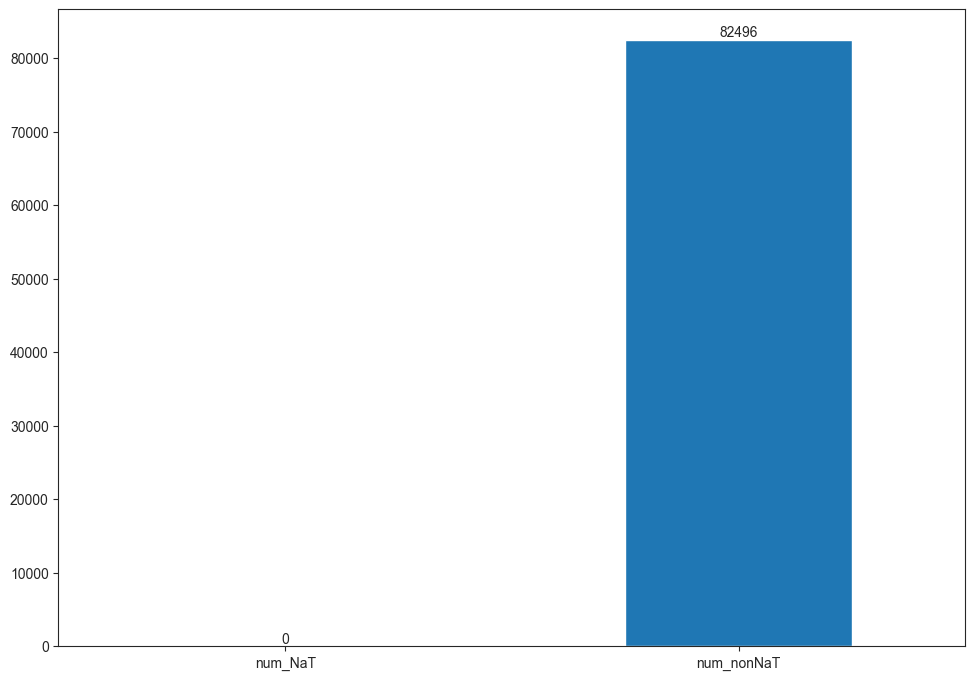

In [1563]:
nat_df = pd.Series({
    "num_NaT": housing_df.Date.isnull().sum(),
    "num_nonNaT": len(housing_df) -  housing_df.Date.isnull().sum()
})

fig, ax  = plt.subplots()
fig.set_size_inches(a4size)

nat_df.plot.bar(rot = 0, ax = ax)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()


In [1564]:
housing_df.Date.to_frame().dtypes

Date    datetime64[ns]
dtype: object

Như vậy các giá trị của cột `Date` đều đã chuyển đổi thành công sang kiểu dữ liệu `datetime`  và không có dữ liệu nào là `NaT`

- **Address - District - Ward**<br>

In [1565]:
columns = ["Address", "District", "Ward"]

In [1566]:
address_df = housing_df[columns].copy()

In [1567]:
address_df

,Address,District,Ward
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Nghĩa Đô
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Kim Giang
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Minh Khai
3,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,Phường Thụy Khuê
4,"Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Kim Giang
...,...,...,...
82491,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc Từ Liêm, Hà Nội",Quận Bắc Từ Liêm,Phường Phúc Diễn
82492,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Quan Hoa
82493,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Quan Hoa
82494,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Quan Hoa


In [1568]:
housing_df.Address.iloc[1]

'Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội'

In [1569]:
# adr_test = housing_df.Address.apply(lambda x: x.str.split(", ", expand = False) if isinstance(x, str) else [x,x,x,x])
pd.set_option('max_colwidth', -1)
adr_test = housing_df.Address.str.split(', ').apply(lambda x: [x,x,x,x] if isinstance(x, float) else x).to_frame()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25524\1704001112.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [1570]:
adr_test["len"] = adr_test["Address"].apply(lambda x: len(x))
adr_test

,Address,len
0,"[Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận Cầu Giấy, Hà Nội]",4
1,"[Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội]",4
2,"[phố minh khai, Phường Minh Khai, Quận Hai Bà Trưng, Hà Nội]",4
3,"[Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ, Hà Nội]",4
4,"[Đường Kim Giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội]",4
...,...,...
82491,"[Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc Từ Liêm, Hà Nội]",4
82492,"[Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội]",4
82493,"[Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội]",4
82494,"[Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội]",4


In [1571]:
adr_test["len"].unique()

array([4, 5, 1, 3, 6, 7, 8, 9, 2], dtype=int64)

In [1572]:
adr_test[adr_test["len"]==5]

,Address,len
29,"[180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Nam Từ Liêm, Hà Nội]",5
42,"[Ngách 6A, Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Thanh Trì, Hà Nội]",5
44,"[4, Đường Kim Giang, Phường Đại Kim, Quận Hoàng Mai, Hà Nội]",5
50,"[88, Đường Phạm Văn Đồng, Phường Cổ Nhuế 1, Quận Bắc Từ Liêm, Hà Nội]",5
82,"[1, Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận Cầu Giấy, Hà Nội]",5
...,...,...
82345,"[285, Đường Đội Cấn, Phường Đội Cấn, Quận Ba Đình, Hà Nội]",5
82350,"[25, 25 Đường Vũ Ngọc Phan, Phường Láng Hạ, Quận Đống Đa, Hà Nội]",5
82401,"[Đường Lê Trọng Tấn Hoài Đức, Hà Nội, Xã Vân Canh, Huyện Hoài Đức, Hà Nội]",5
82422,"[Đường Lạc Long Quân Tây Hồ, Hà Nội, Phường Phú Thượng, Quận Tây Hồ, Hà Nội]",5


Có rất nhiều địa chỉ trong chỗ địa chỉ nhà ngoài trừ số nhà còn có tên đường tọa lạc. Giá trị này sẽ được xử lí nếu có sử dụng trong phần `ĐẶT CÂU HỎI`

- **Type (Loại nhà)**

In [1573]:
type_df = housing_df["Type"].copy()

In [1574]:
num_type_df = type_df.value_counts().to_frame()

In [1575]:
labels = num_type_df.index.tolist()
colors = sns.color_palette('bright')
explode = np.zeros(len(labels)) + 0.02
explode[labels.index(max(labels))] = 0.03

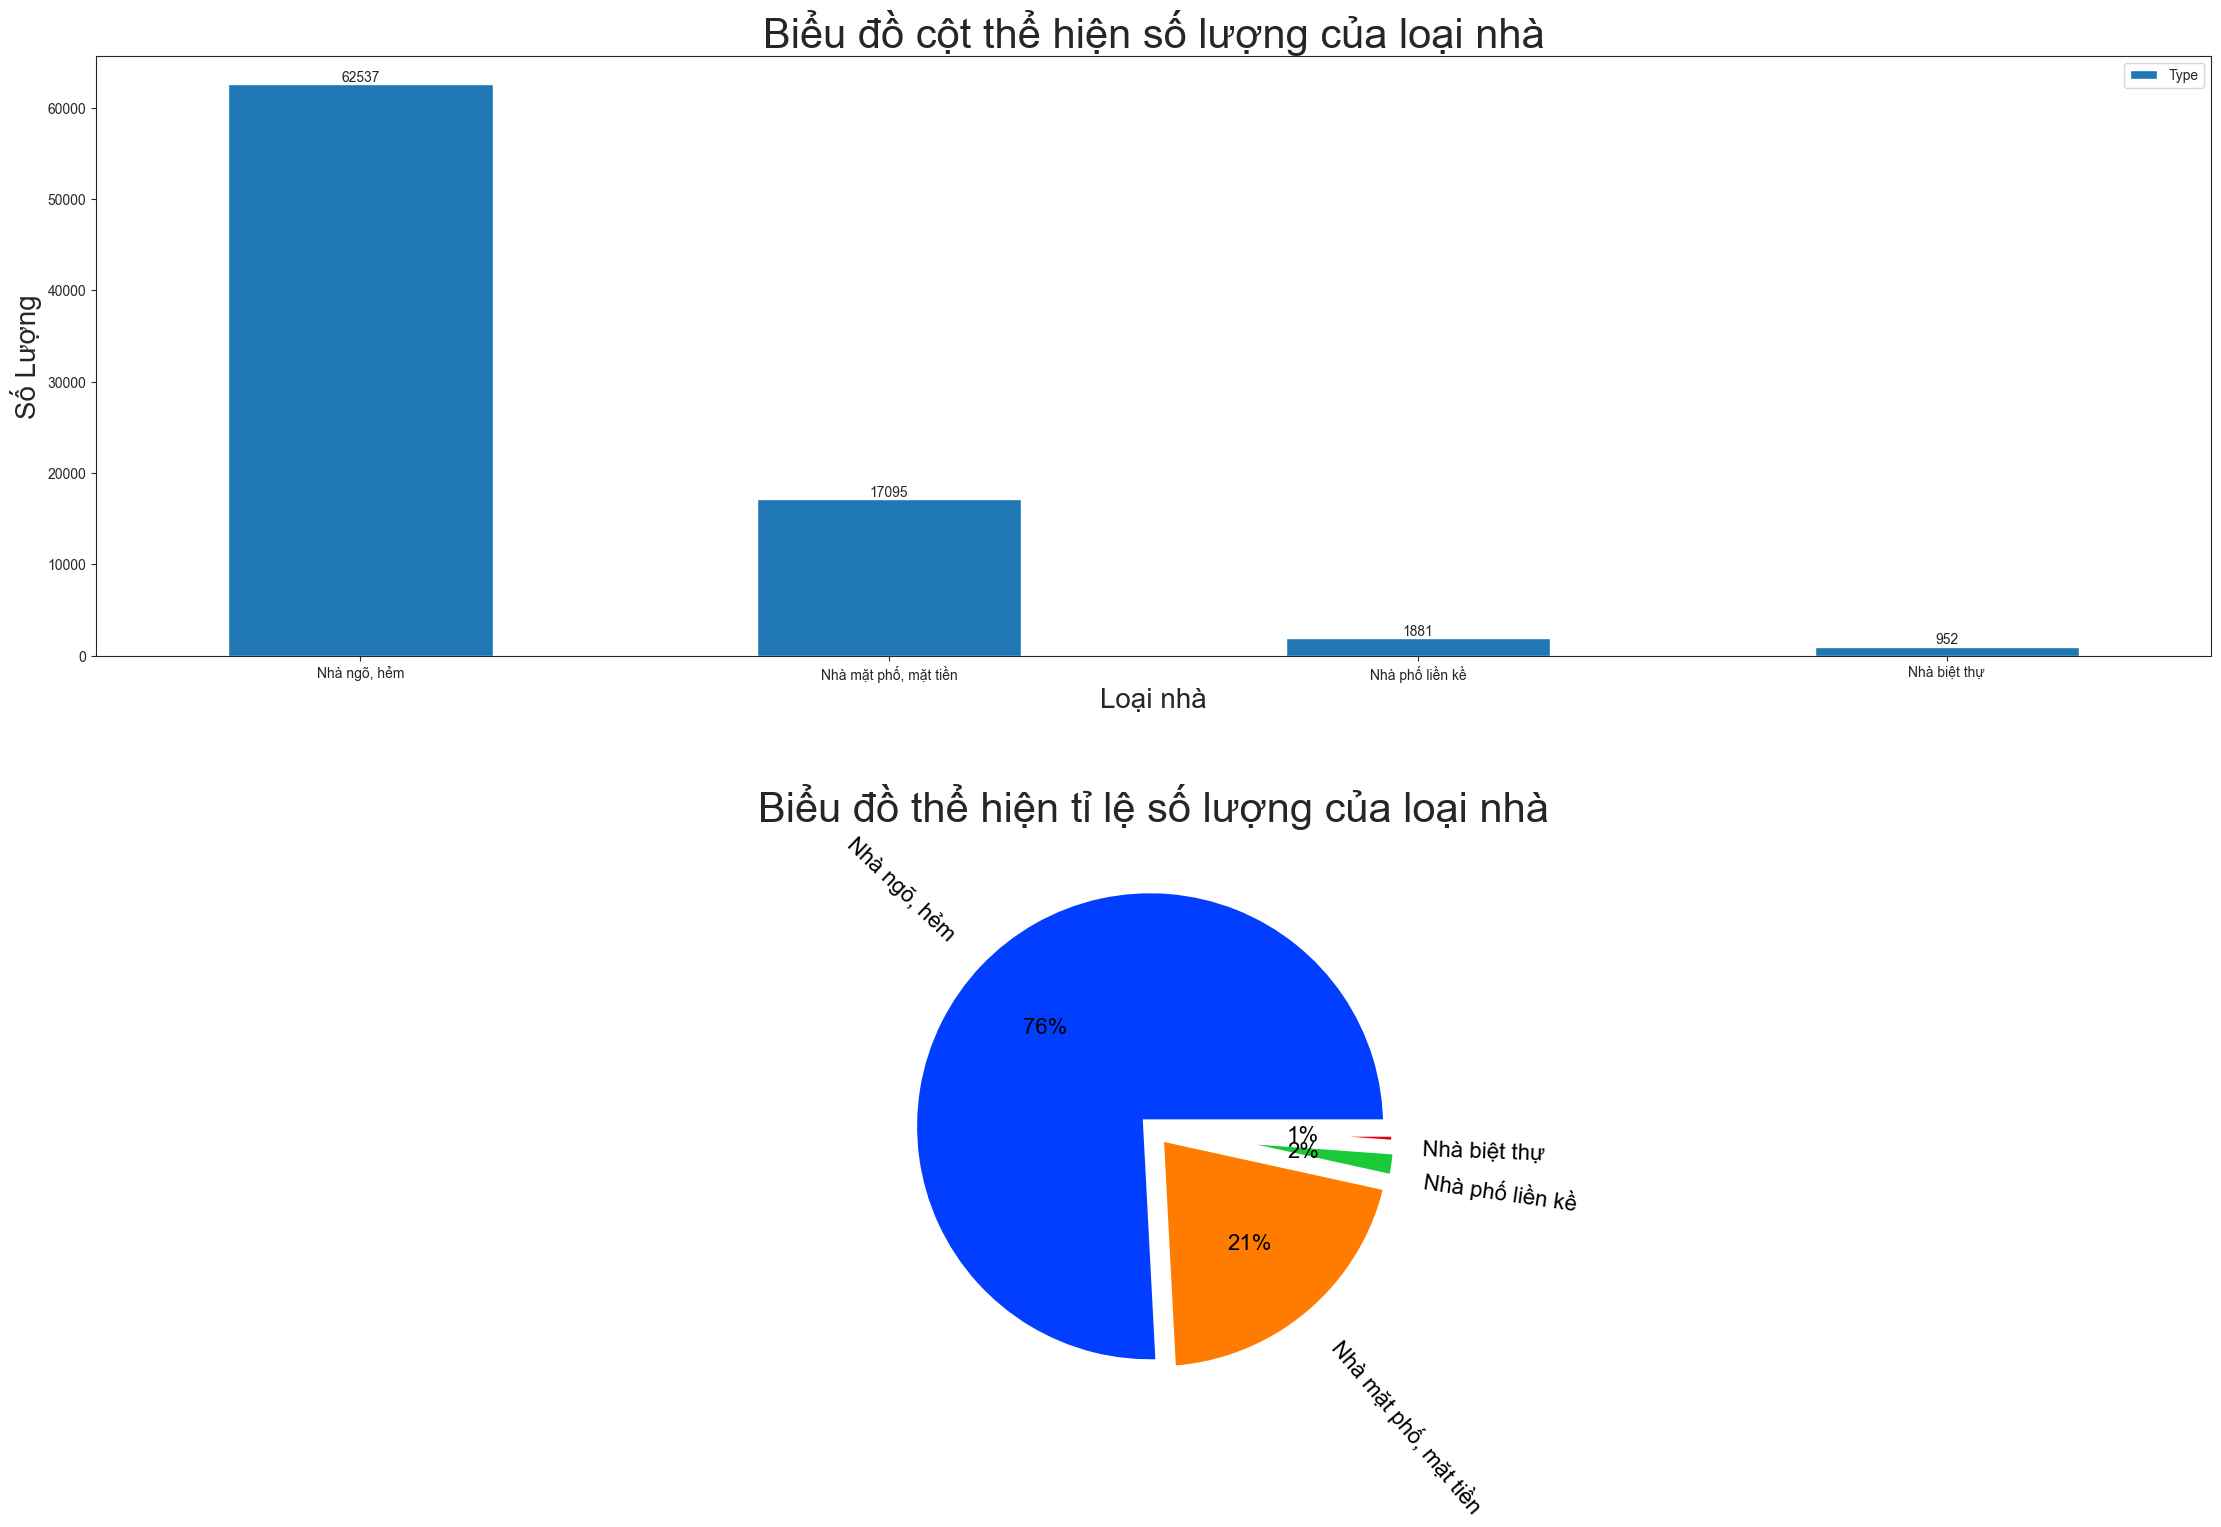

In [1576]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(a2size_ls)

ax[1].pie(
    num_type_df.Type,
    labels = labels,
    colors = colors,
    autopct = '%0.0f%%',
    explode = explode,
    # shadow= True,
    # startangle = 90,
    textprops = {'color': 'Black','fontsize':16},
    wedgeprops = {'linewidth': 10},
    rotatelabels = 'true',
)
ax[1].set_title("Biểu đồ thể hiện tỉ lệ số lượng của loại nhà", fontsize = 30)

num_type_df.plot.bar(ax = ax[0], rot= 0)
for i in ax[0].containers:
    ax[0].bar_label(i,)
ax[0].set_xlabel("Loại nhà", fontsize = 20)
ax[0].set_ylabel("Số Lượng", fontsize = 20)
ax[0].set_title("Biểu đồ cột thể hiện số lượng của loại nhà", fontsize = 30)

plt.tight_layout(pad = 5.0)
plt.show()

Số lượng `Nhà ngõ, hẻm` có nhiều nhất, chiếm đến 76% dữ liệu (không tính các giá trị `NaN`). Tuy Số lượng `NaN` rất ít nhưng vẫn có thể làm thay đổi các giá trị bên trên.

- **Legal**

In [1577]:
legal_df = housing_df.Legal.copy()
legal_df.head()

0    Đã có sổ
1    NaN     
2    Đã có sổ
3    Đã có sổ
4    NaN     
Name: Legal, dtype: object

In [1578]:
legal_df.unique()

array(['Đã có sổ', nan, 'Đang chờ sổ', 'Giấy tờ khác'], dtype=object)

Giá trị `NaN` trong cột này không biết mang ý nghĩa gì, vì thông tin trong Dataset không đề cập tới, cũng không có thông tin cách thu thập. Nên giá trị `NaN` này sẽ được hiểu dưới ý nghĩa là `Không có thông tin`.

In [1579]:
num_legal_df = legal_df.value_counts().to_frame()

In [1580]:
labels = num_legal_df.index.tolist()
colors = sns.color_palette('bright')
explode = np.zeros(len(labels)) + 0.02
explode[labels.index(max(labels))] = 0.0

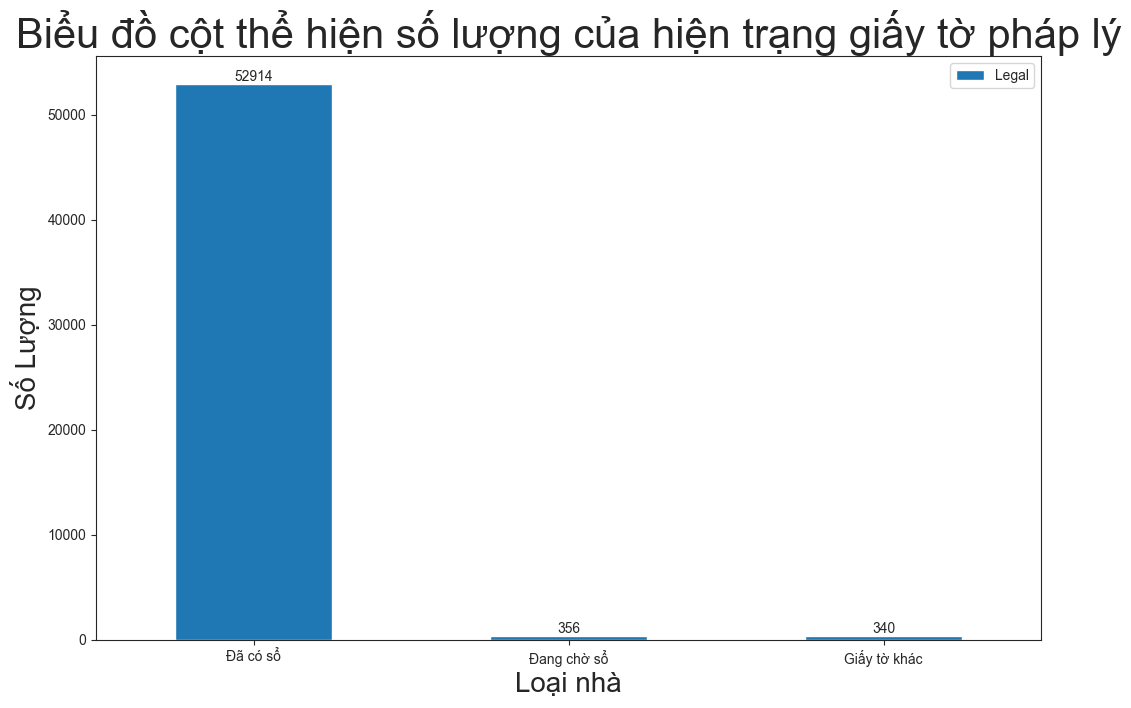

In [1581]:
fig, ax = plt.subplots()
fig.set_size_inches(a4size)

num_legal_df.plot.bar(ax = ax, rot= 0)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xlabel("Loại nhà", fontsize = 20)
ax.set_ylabel("Số Lượng", fontsize = 20)
ax.set_title("Biểu đồ cột thể hiện số lượng của hiện trạng giấy tờ pháp lý", fontsize = 30)

plt.tight_layout(pad = 5.0)
plt.show()

- **Number of bedrooms**

In [1582]:
numB_df = housing_df["Number of bedrooms"].to_frame()

In [1583]:
numB_df.head()

,Number of bedrooms
0,5 phòng
1,3 phòng
2,4 phòng
3,6 phòng
4,4 phòng


In [1584]:
numB_df["Number of bedrooms"].unique()

array(['5 phòng', '3 phòng', '4 phòng', '6 phòng', 'nhiều hơn 10 phòng',
       '8 phòng', '2 phòng', '7 phòng', '9 phòng', '1 phòng', '10 phòng',
       nan], dtype=object)

Các giá trị bên trong cột `Number of bedrooms` được định dạng `<Số phòng>` + ` 'phòng'` <br>
Ta đưa cột này trở về dạng số để dễ cho học máy hoặc trực quan hóa dữ liệu (nếu có)<br>

Trong dữ liệu có một giá trị `nhiều hơn 10 phòng` sẽ được định dạng là số `11`

**Thay đổi các giá trị cột `Number of bedrooms` theo định dạng trên.**

In [1585]:
def change_number_bedrooms(value):
    if isinstance(value, str):
        first = value.split(" ")[0]
        if first.isnumeric():
            return int(first)
        else:
            return 11
    else:
        return value

Test hàm

In [1586]:
assert change_number_bedrooms("10 phòng") == 10
assert change_number_bedrooms("nhiều hơn 10 phòng") == 11

**Thay đổi giá trị cột `number of bedrooms` trong Dataframe chính - `housing_df`**

In [1587]:
housing_df["Number of bedrooms"] = housing_df["Number of bedrooms"].apply(change_number_bedrooms)

- **Number of floors**

In [1588]:
numF_df = housing_df["Number of floors"]

In [1589]:
numF_df.unique()

array(['4', nan, '6', '5', '7', '2', '3', '8', '1', '9', '50', '38', '35',
       '10', 'Nhiều hơn 10', '45', '33', '42', '25', '73', '12', '65',
       '55', '30', '14', '40', '52', '54', '32', '29'], dtype=object)

Tại sao có nhà `73, 65, ...` tầng, nhưng lại có nhà `Nhiều hơn 10 tầng` ??? 

In [1590]:
morethan10F = [ '45', '33', '42', '25', '73', '12', '65', '55', '30', '14', '40', '52', '54', '32', '29', '50', '38', '35']

In [1591]:
housing_df[housing_df["Number of floors"] == "73"]

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
35627,2020-07-14,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,Phường Thụy Khuê,Nhà biệt thự,Đã có sổ,73,6.0,73 m²,14 m,5 m,"81,37 triệu/m²"


In [1592]:
housing_df[housing_df["Number of floors"] == "65"]

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
41446,2020-07-09,"Đường An Hòa, Phường Mộ Lao, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Mộ Lao,"Nhà ngõ, hẻm",Đã có sổ,65,6.0,98 m²,NaN,8 m,"66,33 triệu/m²"


In [1593]:
housing_df[housing_df["Number of floors"] == "12"]

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
39345,2020-07-10,"12, Đường Nguyễn Phúc Lai, Phường Ô Chợ Dừa, Quận Đống Đa, Hà Nội",Quận Đống Đa,Phường Ô Chợ Dừa,Nhà phố liền kề,Đã có sổ,12,5.0,59 m²,11 m,5 m,"144,07 triệu/m²"
82114,2020-06-03,"Đường Đường Láng, Phường Láng Thượng, Quận Đống Đa, Hà Nội",Quận Đống Đa,Phường Láng Thượng,"Nhà mặt phố, mặt tiền",Đã có sổ,12,11.0,170 m²,NaN,8.5 m,"273,53 triệu/m²"


In [1594]:
housing_df[housing_df["Number of floors"].isin(morethan10F)]

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
2627,2020-08-04,"318, Đường Ngọc Trì, Phường Thạch Bàn, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Thạch Bàn,"Nhà ngõ, hẻm",Đã có sổ,50,3.0,30 m²,8 m,4 m,75 triệu/m²
2940,2020-08-03,Đường Đại lộ Thăng Long,Quận Nam Từ Liêm,Phường Đại Mỗ,"Nhà mặt phố, mặt tiền",Đang chờ sổ,38,3.0,80 m²,NaN,NaN,"37,5 triệu/m²"
3443,2020-08-03,"Đường Tam Trinh, Phường Lĩnh Nam, Quận Hoàng Mai, Hà Nội",Quận Hoàng Mai,Phường Lĩnh Nam,"Nhà mặt phố, mặt tiền",Đã có sổ,35,3.0,44 m²,NaN,35 m,"11,32 triệu/m²"
7727,2020-07-31,"đường kim giang, Phường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Đã có sổ,35,4.0,48 m²,NaN,NaN,"83,33 triệu/m²"
10021,2020-07-30,"vũ tông phan, Phường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Đã có sổ,45,3.0,35 m²,NaN,NaN,100 triệu/m²
12476,2020-07-29,"Đường Cầu Giấy, Phường Trung Hoà, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Trung Hoà,"Nhà ngõ, hẻm",Đã có sổ,33,2.0,21 m²,7 m,3.3 m,"104,76 triệu/m²"
12823,2020-07-29,"814, Đường Láng, Phường Láng Thượng, Quận Đống Đa, Hà Nội",Quận Đống Đa,Phường Láng Thượng,"Nhà ngõ, hẻm",Đã có sổ,45,3.0,52 m²,NaN,NaN,"74,04 triệu/m²"
13406,2020-07-28,"Đường Tây Thăng Long, Thị trấn Phùng, Huyện Đan Phượng, Hà Nội",Huyện Đan Phượng,Thị trấn Phùng,Nhà biệt thự,Giấy tờ khác,45,6.0,200 m²,25 m,8 m,25 triệu/m²
14365,2020-07-28,"Đường Phúc Lợi, Phường Phúc Lợi, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Phúc Lợi,"Nhà ngõ, hẻm",Đã có sổ,45,3.0,30 m²,6.77 m,4.45 m,"61,67 triệu/m²"
19330,2020-07-24,"Đường Hoa Sữa 1 - 23, Phường Phúc Lợi, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Phúc Lợi,"Nhà ngõ, hẻm",Đã có sổ,45,3.0,30 m²,6 m,5 m,63 triệu/m²


Không biết đây có phải là các dữ liệu mâu thuẫn, gây nhiễu hay không. Nên sẽ định dạng các giá trị này xem như là `Nhiều hơn 10 tầng` và chuyển nó thành `11`

In [1595]:
def change_number_F(value):
    if isinstance(value, str):
        first = value.split(" ")[0]
        if first.isnumeric():
            if int(first) < 11:
                return int(first)
            else:
                return 11
        else:
            return 11
    else:
        return value

In [1596]:
assert change_number_F("54") == 11
assert change_number_F("Nhiều hơn 10") == 11
assert change_number_F("4") == 4

**Thay đổi giá trị cột `Number of floors`**

In [1597]:
housing_df["Number of floors"] = housing_df["Number of floors"].apply(change_number_F)

In [1598]:
numF_count = housing_df["Number of floors"].value_counts().to_frame().sort_index()

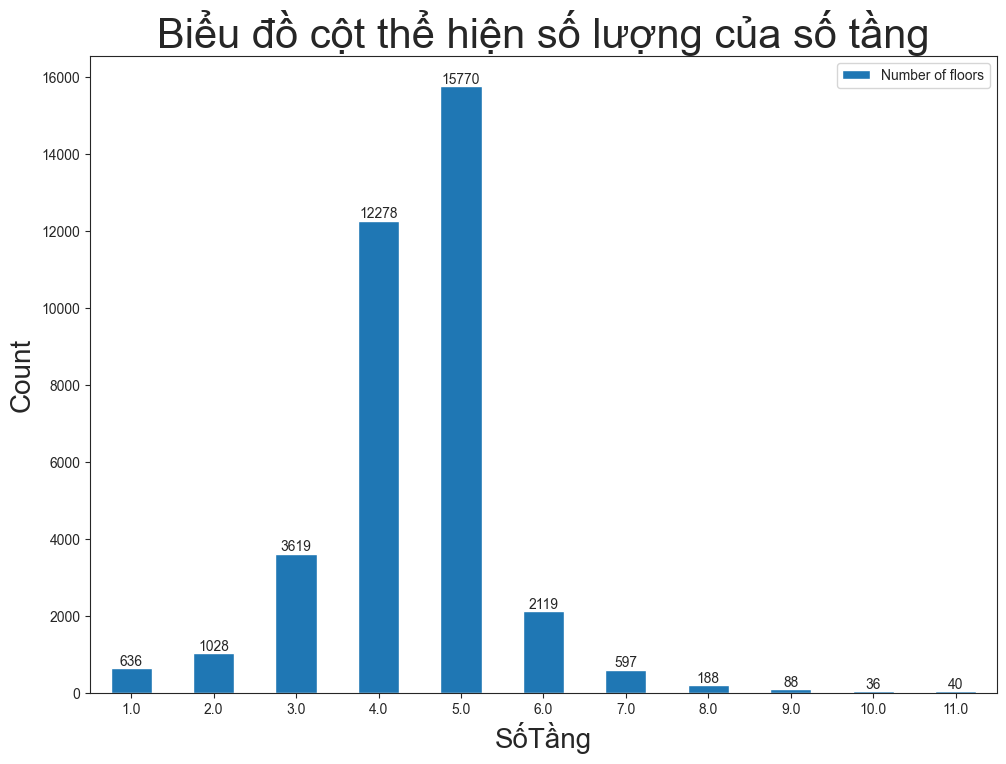

In [1599]:
fig, ax = plt.subplots()
fig.set_size_inches(a4size)

numF_count.plot.bar(rot = 0, ax = ax)
ax.set_xlabel("SốTầng", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Biểu đồ cột thể hiện số lượng của số tầng", fontsize =30)

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Số tầng lớn hơn 10 không quá nhiều, có lẻ không ảnh hưởng mấy đến các quá trình sau.

- **Length - Width - Area - Price/m2**

In [1600]:
housing_df[~housing_df.Length.isna()].Length

2        10 m   
3        12.75 m
4        9 m    
5        12.1 m 
8        12 m   
         ...    
82355    13 m   
82356    16 m   
82359    14 m   
82361    20 m   
82362    20 m   
Name: Length, Length: 19827, dtype: object

Ta nhận thấy ngoài giá trị `NaN`, các giá trị còn lại được định dạng theo `<số kích thước>` `"m"`

Xây dựng một hàm để tách số ra khỏi `m`

In [1601]:
def split_size(size):
    if not isinstance(size, float):
        if size[-1] != "m":
            try:
                return float(size)
            except ValueError:
                return size

        first = size.split("m")[0]
        try:
            return float(first)
        except ValueError:
            return size
    else:
        return size

In [1602]:
assert split_size("2.2 m") == 2.2
assert split_size("2.2x34 m") == "2.2x34 m"
assert split_size("23 x 32") == "23 x 32"
assert split_size("2.3") == 2.3

In [1603]:
housing_df.Length = housing_df.Length.apply(split_size)

<AxesSubplot: >

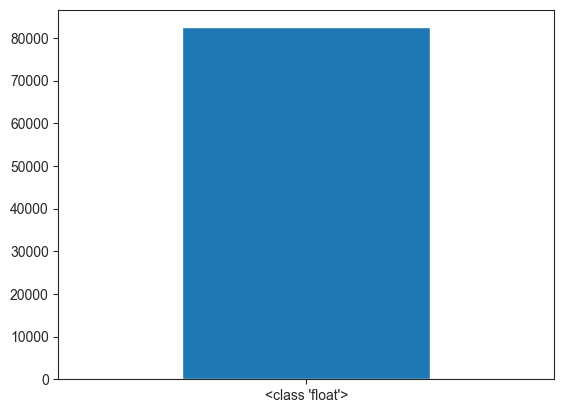

In [1604]:
num_type = housing_df.Length.apply(lambda x: type(x))
num_type.value_counts().plot.bar(rot = 0)

Như vậy các giá trị của cột `Length` đều đã chuyển thành công sang dạng float và bỏ qua chữ `m`. Không có giá trị bị nhiễu, vì nếu có thì biểu đồ ở trên sẽ trả ra 2 kiểu dữ liệu là `float` và `string`.

In [1605]:
housing_df[~housing_df.Width.isna()].Width

2        4 m  
3        4 m  
4        4 m  
5        3.8 m
6        4.5 m
         ...  
82357    4 m  
82359    5 m  
82360    3 m  
82361    4 m  
82362    4 m  
Name: Width, Length: 35445, dtype: object

Vậy có thể cột `Width` cũng giống như `Length`

In [1606]:
housing_df.Width = housing_df.Width.apply(split_size)

<AxesSubplot: >

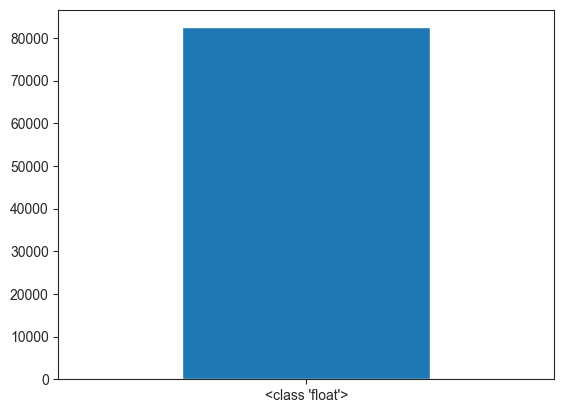

In [1607]:
num_type = housing_df.Width.apply(lambda x: type(x))
num_type.value_counts().plot.bar(rot = 0)

In [1608]:
housing_df[~housing_df.Area.isna()].Area

0        46 m²
1        37 m²
2        40 m²
3        51 m²
4        36 m²
         ...  
82491    38 m²
82492    50 m²
82493    41 m²
82494    60 m²
82495    45 m²
Name: Area, Length: 82495, dtype: object

Giờ là `m²`, nên phải viết lại hàm `split_size` thành `split_area`

In [1609]:
def split_area(area):
    if not isinstance(area, float):
        if area[-2:] != "m²":
            try:
                return float(area)
            except ValueError:
                return area

        first = area.split("m²")[0]
        try:
            return float(first)
        except ValueError:
            return area
    else:
        return area

In [1610]:
assert split_area("2.2 m²") == 2.2
assert split_area("2.2x34 m²") == "2.2x34 m²"
assert split_area("23 x 32") == "23 x 32"
assert split_area("2.3") == 2.3

In [1611]:
housing_df.Area = housing_df.Area.apply(split_area)

<AxesSubplot: >

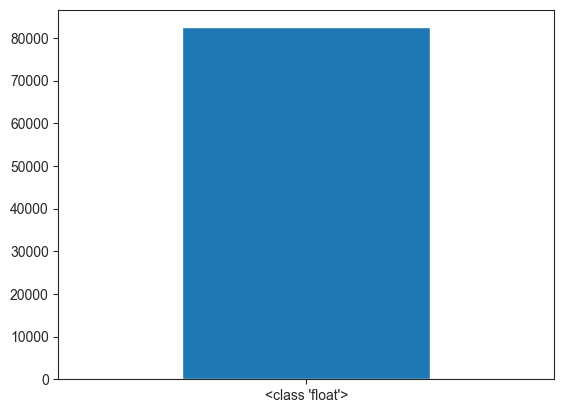

In [1612]:
num_type = housing_df.Area.apply(lambda x: type(x))
num_type.value_counts().plot.bar(rot = 0)

In [1613]:
price_df = housing_df["Price/m2"].to_frame().copy()
price_df

,Price/m2
0,"86,96 triệu/m²"
1,"116,22 triệu/m²"
2,65 triệu/m²
3,100 triệu/m²
4,"86,11 triệu/m²"
...,...
82491,"81,58 triệu/m²"
82492,292 triệu/m²
82493,"341,46 triệu/m²"
82494,"101,67 triệu/m²"


Các giá tiền có một chút bị `lỗi`, thay vì dấu `.`, cột này lại định dạng theo dấu `,`

In [1614]:
def split_price(price):
    if not isinstance(price, float):
        if ',' in price:
            price = price.replace(",",".")
        if price.strip(" ")[-8:] != "triệu/m²":
            try:
                return float(price)
            except ValueError:
                return price

        first = price.split("triệu/m²")[0]
        try:
            return float(first)
        except ValueError:
            return price
    else:
        return price

In [1615]:
price_df["Price/m2"] = price_df["Price/m2"].apply(split_price)

In [1616]:
price_df["Price/m2"]

0        86.96 
1        116.22
2        65.0  
3        100.0 
4        86.11 
         ...   
82491    81.58 
82492    292.0 
82493    341.46
82494    101.67
82495    102.22
Name: Price/m2, Length: 82496, dtype: object

<AxesSubplot: >

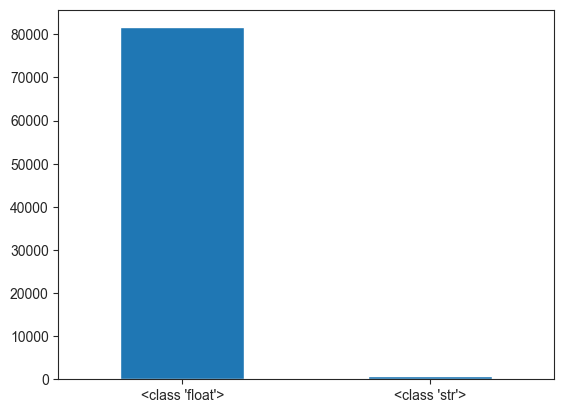

In [1617]:
num_type = price_df["Price/m2"].apply(lambda x: type(x))
num_type.value_counts().plot.bar(rot = 0)

Dữ liệu vẫn còn bị dạng `string`. ???

In [1618]:
price_df[price_df["Price/m2"].apply(lambda x: True if isinstance(x, str) else False)]["Price/m2"]

93       247.787 đ/m²
174      1 đ/m²      
283      90.476 đ/m² 
338      178.571 đ/m²
351      125.000 đ/m²
             ...     
82294    59.183 đ/m² 
82316    85.555 đ/m² 
82325    86.842 đ/m² 
82344    69.565 đ/m² 
82349    105.714 đ/m²
Name: Price/m2, Length: 858, dtype: object

Vậy xây dựng thêm một hàm y như hàm `split_price` nhưng thay đổi giá trị được tách.

In [1619]:
def split_price2(price):
    if not isinstance(price, float):
        if ',' in price:
            price = price.replace(",",".")
        if price.strip(" ")[-4:] != "đ/m²":
            try:
                return float(price)
            except ValueError:
                return price

        first = price.split("đ/m²")[0]
        try:
            return float(first)
        except ValueError:
            return price
    else:
        return price

In [1620]:
price_df["Price/m2"] = price_df["Price/m2"].apply(split_price2)

<AxesSubplot: >

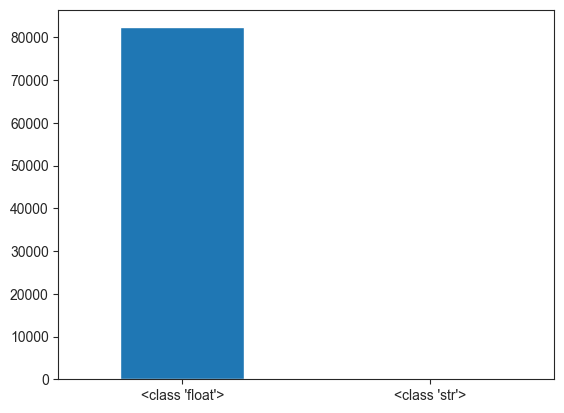

In [1621]:
num_type = price_df["Price/m2"].apply(lambda x: type(x))
num_type.value_counts().plot.bar(rot = 0)

@@ Vẫn còn dạng `string`.

In [1622]:
price_df[price_df["Price/m2"].apply(lambda x: True if isinstance(x, str) else False)]["Price/m2"]

1100     1.202777777 tỷ/m²
1144     1.142857142 tỷ/m²
1657     1.96 tỷ/m²       
2849     1.557142857 tỷ/m²
2939     1.316666666 tỷ/m²
               ...        
78107    5.833333333 tỷ/m²
79034    1.0125 tỷ/m²     
79835    1.706666666 tỷ/m²
80222    1.5 tỷ/m²        
81845    2.538461538 tỷ/m²
Name: Price/m2, Length: 118, dtype: object

Có rất nhiều cách để thể hiện mức giá nên, cột này sẽ không xử lí. Để các tình huống `Đặt câu hỏi`, `Mô hình học máy`, nếu cần thiết có thể tiền xử lí trước khi thực hiện.

In [1623]:
price_df = housing_df["Price/m2"].to_frame()

In [1624]:
import re
price_df["Unit"] = price_df["Price/m2"].apply(lambda x: re.findall(r"\w+[/]\w+", x)[0] if isinstance(x, str) else x)

<AxesSubplot: >

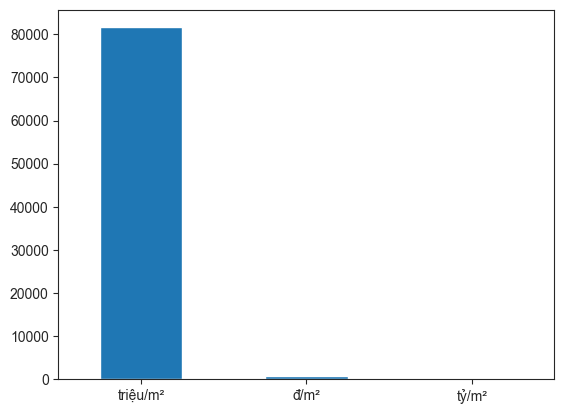

In [1625]:
price_df.Unit.value_counts().plot.bar(rot = 0)

Như vậy có 3 đơn vị giá tiền trong cột. Đó là `triệu/m2`, `đ/m2` và `tỷ/m2`

In [1626]:
housing_df["Unit"] = price_df.Unit

# **Thông tin các cột**

| Tên cột | Kiểu dữ liệu | Mô tả | 
| --- | --- | --- |
| Date | datetime | Ngày đăng bán | 
| Address | string | Địa chỉ căn nhà | 
| District | string | Quận |
| Ward | string | Huyện | 
| Type | string | Kiểu nhà ở |
| Legal | string | Giấy tờ pháp lý của nhà ở |  
| Number of floors | float | Số tầng | 
| Number of bedrooms | float | Số phòng ngủ |
| Area | float | Diện tích căn nhà |
| Length | float | Chiều dài căn nhà |
| Width | float | Chiều rộng căn nhà |
| Price/m2 | string | Số tiền mua căn nhà | 
| Unit | string | Đơn vị của giá tiền |


In [1627]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82496 entries, 0 to 82495
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                82496 non-null  datetime64[ns]
 1   Address             82449 non-null  object        
 2   District            82495 non-null  object        
 3   Ward                82449 non-null  object        
 4   Type                82465 non-null  object        
 5   Legal               53610 non-null  object        
 6   Number of floors    36399 non-null  float64       
 7   Number of bedrooms  82458 non-null  float64       
 8   Area                82495 non-null  float64       
 9   Length              19827 non-null  float64       
 10  Width               35445 non-null  float64       
 11  Price/m2            82484 non-null  object        
 12  Unit                82484 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
me

In [1628]:
columns = housing_df.columns
cate_profiles = {'missing_ratio': housing_df[columns].isna().sum() * 100.0/len (housing_df[columns]),
                    'num_diff_vals': housing_df[columns].nunique (dropna=True),
                    'diff vals': housing_df[columns].stack(dropna=True).groupby(level= [1]). unique (),
}
cate_col_profiles_df = pd.DataFrame(cate_profiles).transpose()
cate_col_profiles_df

Address  \
missing_ratio  0.056972                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [1629]:
housing_df.to_csv("./csv/EDA_Preprocessing.csv")

# **LƯU Ý**<br>
- Chỉnh lại kiểu dữ liệu cho cột `Date` nếu tạo file ipynb cho phần `Đặt câu hỏi`